<a href="https://colab.research.google.com/github/aivrm/ai/blob/main/EX_2_13_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_2_%EB%82%A0%EC%94%A8_%EC%A2%8B%EC%9D%80_%EC%9B%94%EC%9A%94%EC%9D%BC_%EC%98%A4%ED%9B%84_%EC%84%B8_%EC%8B%9C%2C_%EC%9E%90%EC%A0%84%EA%B1%B0_%ED%83%80%EB%8A%94_%EC%82%AC%EB%9E%8C%EC%9D%80_%EB%AA%87_%EB%AA%85%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EX 2-13. 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

---
### (1) 데이터 가져오기
* 터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다.
* 여기에서 데이터를 상세히 확인할 수 있습니다.
---

---
● Bike Sharing Demand

* Forecast use of a city bikeshare system

https://www.kaggle.com/c/bike-sharing-demand/data

---

In [ ]:
from sklearn.datasets import load_diabetes

In [ ]:
diabetes = load_diabetes()

In [ ]:
# 내용 설명
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
# 데이터셋을 대충 보기
diabetes

{'DESCR': '.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, total serum cholesterol\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, total cholesterol / HDL\n      - s5      ltg, possibly log of serum triglycerides level\n      - s6      glu, b

In [ ]:
dir(diabetes)

['DESCR',
 'data',
 'data_filename',
 'data_module',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [ ]:
print(dir(diabetes))

['DESCR', 'data', 'data_filename', 'data_module', 'feature_names', 'frame', 'target', 'target_filename']


In [ ]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [ ]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:
for i, feature_name in enumerate(diabetes.feature_names):
    print('feature ', i+1, feature_name)

feature  1 age
feature  2 sex
feature  3 bmi
feature  4 bp
feature  5 s1
feature  6 s2
feature  7 s3
feature  8 s4
feature  9 s5
feature  10 s6


In [ ]:
'''
440명의 10가지 속성
      - age     (나이)
      - sex     (성별)
      - bmi     body mass index (BMI: 체질량지수)
      - bp      average blood pressure (평균 혈압)
      - s1      tc, total serum cholesterol (혈청 콜레스테롤)
      - s2      ldl, low-density lipoproteins (저밀도 지단백질)
      - s3      hdl, high-density lipoproteins (고밀도 지단백질)
      - s4      tch, total cholesterol / HDL (총 콜레스테롤)
      - s5      ltg, possibly log of serum triglycerides level (혈청 트리글리세리드 수준의 가능한 로그)
      - s6      glu, blood sugar level (혈당 수치)
'''

'\n440명의 10가지 속성\n      - age     (나이)\n      - sex     (성별)\n      - bmi     body mass index (BMI: 체질량지수)\n      - bp      average blood pressure (평균 혈압)\n      - s1      tc, total serum cholesterol (혈청 콜레스테롤)\n      - s2      ldl, low-density lipoproteins (저밀도 지단백질)\n      - s3      hdl, high-density lipoproteins (고밀도 지단백질)\n      - s4      tch, total cholesterol / HDL (총 콜레스테롤)\n      - s5      ltg, possibly log of serum triglycerides level (혈청 트리글리세리드 수준의 가능한 로그)\n      - s6      glu, blood sugar level (혈당 수치)\n'

In [ ]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [ ]:
data = diabetes.data

In [ ]:
data[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

---
### (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
* to_datetime 활용 : 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html#pandas.to_datetime

* pandas datetime extract year month day 키워드로 검색해 보기

---

In [ ]:
import pandas as pd

In [ ]:
df_X = pd.DataFrame(data=data, columns=diabetes.feature_names)
df_X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [ ]:
type(df_X)

pandas.core.frame.DataFrame

In [ ]:
X = df_X.values

In [ ]:
type(X)

numpy.ndarray

---
### (3) year, month, day, hour, minute, second 데이터 개수 시각화 하기
* sns.countplot 활용해서 시각화 하기
* subplot 을 활용해서 한 번에 6개의 그래프 함께 시각화 하기

---

In [ ]:
y = diabetes.target

In [ ]:
type(y)

numpy.ndarray

---
### (4) X, y 컬럼 선택 및 train/test 데이터 분리
* X(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다. 만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다. ex) count를 예측하는데 casual,registered 컬럼이 필요할까요?

* count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기

---

In [ ]:
# 데이타를 학습과 평가용으로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print('X_train 개수: ', len(X_train))
print('X_test 개수 : ', len(X_test))

(353, 10) (353,)
(89, 10) (89,)
X_train 개수:  353
X_test 개수 :  89


In [ ]:
X_train.shape, y_train.shape

((353, 10), (353,))

In [ ]:
X_test.shape, y_test.shape

((89, 10), (89,))

In [ ]:
y_train, y_test

(array([144., 150., 280., 125.,  59.,  65., 281., 277., 167.,  90.,  72.,
        178.,  88., 270., 101., 197.,  97.,  53.,  71., 262.,  52., 102.,
        166., 189., 173., 220., 206.,  97.,  60.,  61., 242., 121., 128.,
        104., 265., 132., 283., 174., 129., 257., 137.,  63.,  93., 232.,
        208., 261., 179., 258., 262.,  51., 237.,  71., 139., 268.,  69.,
        317., 249., 154., 192., 116.,  81., 122., 259., 191., 292.,  55.,
        107., 210.,  91., 253.,  85., 252.,  59.,  78., 200.,  78., 245.,
        175.,  42., 127.,  53.,  94., 104., 199., 265., 281., 248., 257.,
        215., 303., 170.,  59., 277., 209., 138., 198., 124.,  96., 288.,
        225., 265., 101.,  55., 198.,  51., 252.,  64., 220., 131., 212.,
        142., 103., 155., 121.,  86., 111.,  65., 131.,  51., 128., 141.,
         48., 109., 178.,  88.,  84., 216., 150.,  60.,  96., 190.,  74.,
        279., 182., 160., 245., 276., 174., 180., 150., 196., 138.,  97.,
        246., 321., 308., 109.,  69., 

---
### (5) LinearRegression 모델 학습
* sklearn의 LinearRegression 모델 불러오기 및 학습하기

---

#### W , b

In [ ]:
import numpy as np
W = np.random.rand(10)
b = np.random.rand()

In [ ]:
W

array([0.82093226, 0.02482723, 0.22774868, 0.19993502, 0.77514248,
       0.18517354, 0.67046186, 0.65415298, 0.55915335, 0.18512389])

In [ ]:
b

0.6683488827355871

#### 모델

In [ ]:
### 모델
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

---
### (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
* 학습된 모델에 X_test를 입력해서 예측값 출력하기
* 모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
* mse 값과 함께 rmse 값도 계산하기

---

In [ ]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [ ]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

---
### (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
* x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
* x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기

---


In [ ]:
def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [ ]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [ -60.54324596  -13.86808659 -189.67723272 -142.72140271  -68.25115363
  -56.01851233  127.77445307 -139.08749679 -182.89835492 -123.59254389]
db: -302.9302705603207


### (8) 하이퍼 파라미터 인 학습률 설정하기

In [ ]:
#LEARNING_RATE = 0.0001
LEARNING_RATE = 0.1

### (9) 모델 학습하기

In [ ]:
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 4524.6373
Iteration 20 : Loss 3657.9599
Iteration 30 : Loss 3381.5528
Iteration 40 : Loss 3229.1506
Iteration 50 : Loss 3132.5393
Iteration 60 : Loss 3067.0732
Iteration 70 : Loss 3021.2694
Iteration 80 : Loss 2988.6833
Iteration 90 : Loss 2965.2542
Iteration 100 : Loss 2948.2679
Iteration 110 : Loss 2935.8585
Iteration 120 : Loss 2926.7245
Iteration 130 : Loss 2919.9499
Iteration 140 : Loss 2914.8858
Iteration 150 : Loss 2911.0694
Iteration 160 : Loss 2908.1691
Iteration 170 : Loss 2905.9456
Iteration 180 : Loss 2904.2255
Iteration 190 : Loss 2902.8823
Iteration 200 : Loss 2901.8231
Iteration 210 : Loss 2900.9791
Iteration 220 : Loss 2900.2995
Iteration 230 : Loss 2899.7462
Iteration 240 : Loss 2899.2904
Iteration 250 : Loss 2898.9106
Iteration 260 : Loss 2898.5900
Iteration 270 : Loss 2898.3161
Iteration 280 : Loss 2898.0791
Iteration 290 : Loss 2897.8714
Iteration 300 : Loss 2897.6872
Iteration 310 : Loss 2897.5217
Iteration 320 : Loss 2897.3714
Iteration 330 : L

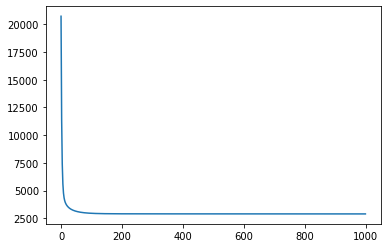

In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [ ]:
W, b

(array([  42.00177429, -240.26673627,  556.837388  ,  342.96340103,
        -181.61982842,  -67.98972878, -175.57418874,  167.51483959,
         450.07100959,   54.06672334]), 151.30723616010854)

### (10) test 데이터에 대한 성능 확인하기

In [ ]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2885.5628339155883

### (11) 정답 데이터와 예측한 데이터 시각화 하기

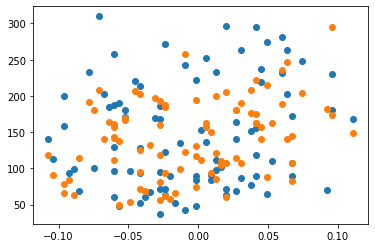

In [ ]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

---
---
---
사이킷런 과 비교
---
---
---



In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
print(model._estimator_type)

regressor


In [ ]:
model = LinearRegression()

In [ ]:
# 학습
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 예측
y_pred = model.predict(X_test)
y_pred

array([139.5483133 , 179.52030578, 134.04133298, 291.41193598,
       123.78723656,  92.17357677, 258.23409704, 181.33895238,
        90.22217862, 108.63143298,  94.13938654, 168.43379636,
        53.50669663, 206.63040068, 100.13238561, 130.66881649,
       219.53270758, 250.78291772, 196.36682356, 218.57497401,
       207.35002447,  88.48361667,  70.43428801, 188.95725301,
       154.88720039, 159.35957695, 188.31587948, 180.38835506,
        47.98988446, 108.97514644, 174.78080029,  86.36598906,
       132.95890535, 184.5410226 , 173.83298051, 190.35863287,
       124.41740796, 119.65426903, 147.95402494,  59.05311211,
        71.62636914, 107.68722902, 165.45544477, 155.00784964,
       171.04558668,  61.45763075,  71.66975626, 114.96330486,
        51.57808027, 167.57781958, 152.52505798,  62.95827693,
       103.49862017, 109.20495627, 175.63844013, 154.60247734,
        94.41476124, 210.74244148, 120.25601864,  77.61590087,
       187.93503183, 206.49543321, 140.63018684, 105.59

In [ ]:
y_pred.shape

(89,)

In [ ]:
y_test

array([219.,  70., 202., 230., 111.,  84., 242., 272.,  94.,  96.,  94.,
       252.,  99., 297., 135.,  67., 295., 264., 170., 275., 310.,  64.,
       128., 232., 129., 118., 263.,  77.,  48., 107., 140., 113.,  90.,
       164., 180., 233.,  42.,  84., 172.,  63.,  48., 108., 156., 168.,
        90.,  52., 200.,  87.,  90., 258., 136., 158.,  69.,  72., 171.,
        95.,  72., 151., 168.,  60., 122.,  52., 187., 102., 214., 248.,
       181., 110., 140., 202., 101., 222., 281.,  61.,  89.,  91., 186.,
       220., 237., 233.,  68., 190.,  96.,  72., 153.,  98.,  37.,  63.,
       184.])

In [ ]:
y_test.shape

(89,)

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mse

2900.1732878832318

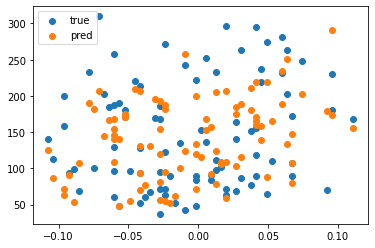

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], y_pred, label="pred")
plt.legend()
plt.show()